In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px  # for world map
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv
/kaggle/input/world-population-19602018/population_total_long.csv
/kaggle/input/world-population-19602018/pop_worldometer_data.csv
/kaggle/input/world-population-19602018/population_above_age_65_percentage_long.csv
/kaggle/input/world-population-19602018/population_female_percentage_long.csv
/kaggle/input/world-population-19602018/population_below_age_14_percentage_long.csv
/kaggle/input/world-population-19602018/population_density_long.csv


### What will we do with this project

** Business Data Analysis

** Multivarate Data Analysis

** Seaborn Library plot

** Plotly plot

### Introduction
The World Happiness Report is a landmark survey of the state of global happiness.

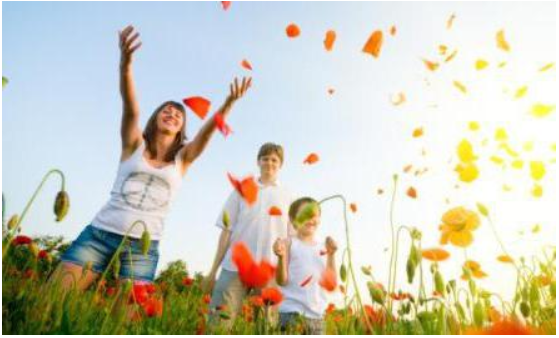


1. Ladder score: Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
2. Logged GDP per capita: The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
3. Social support: Social support refers to assistance or support provided by members of social networks to an individual.
4. Healthy life expectancy: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
5. Freedom to make life choices: Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
6. Generosity: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
7. Perceptions of corruption: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”
8. Ladder score in Dystopia: It has values equal to the world’s lowest national averages. Dystopia as a benchmark against which to compare contributions from each of the six factors. Dystopia is an imaginary country that has the world's least-happy people. ... Since life would be very unpleasant in a country with the world's lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom, and least social support, it is referred to as “Dystopia,” in contrast to Utopia

In [2]:
# read data
df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
# show first five row of data
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
# describe basic statistics of data with numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [5]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [6]:
df.isnull().values.any()

True

In [7]:
# read data
df2021 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")

In [8]:
# show first five row of data
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [9]:
# describe basic statistics of data
df2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [10]:
# information about data
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [11]:
df2021.isnull().values.any()

False

### Data Distributions in 2021
1. Unique Countries
2. Count Regional Indicator
3. Distribution of Remaining Features

In [12]:
# unique countries
df2021['Country name'].unique()

array(['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands',
       'Norway', 'Sweden', 'Luxembourg', 'New Zealand', 'Austria',
       'Australia', 'Israel', 'Germany', 'Canada', 'Ireland',
       'Costa Rica', 'United Kingdom', 'Czech Republic', 'United States',
       'Belgium', 'France', 'Bahrain', 'Malta',
       'Taiwan Province of China', 'United Arab Emirates', 'Saudi Arabia',
       'Spain', 'Italy', 'Slovenia', 'Guatemala', 'Uruguay', 'Singapore',
       'Kosovo', 'Slovakia', 'Brazil', 'Mexico', 'Jamaica', 'Lithuania',
       'Cyprus', 'Estonia', 'Panama', 'Uzbekistan', 'Chile', 'Poland',
       'Kazakhstan', 'Romania', 'Kuwait', 'Serbia', 'El Salvador',
       'Mauritius', 'Latvia', 'Colombia', 'Hungary', 'Thailand',
       'Nicaragua', 'Japan', 'Argentina', 'Portugal', 'Honduras',
       'Croatia', 'Philippines', 'South Korea', 'Peru',
       'Bosnia and Herzegovina', 'Moldova', 'Ecuador', 'Kyrgyzstan',
       'Greece', 'Bolivia', 'Mongolia', 'Paraguay', 'Montenegro

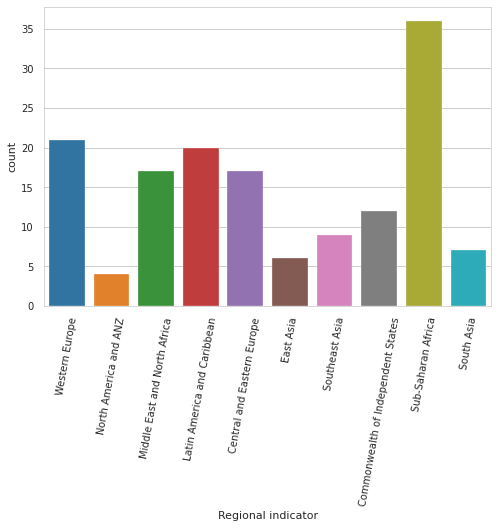

In [13]:
# count regional indicator
sns.countplot(df2021["Regional indicator"])
plt.xticks(rotation = 80)
plt.show()

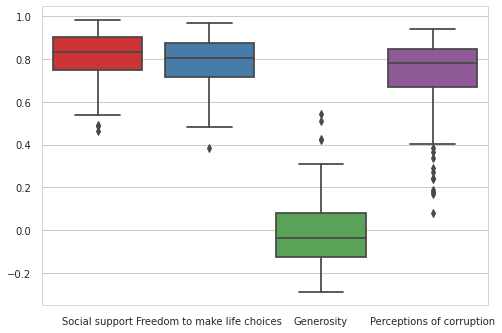

In [14]:
# distribution of feature set 1 we choise this variables because their values nearly same range
list_features = ["Social support", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

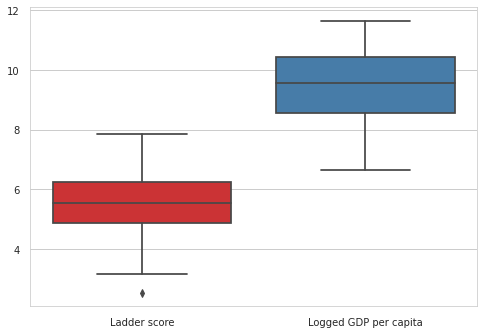

In [15]:
# distribution of feature set 2
list_features = ["Ladder score", "Logged GDP per capita"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()
#  We see that there are unhappiest countries in data

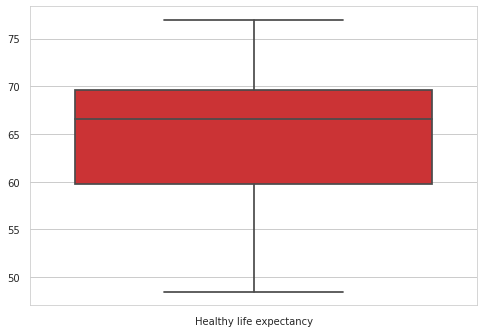

In [16]:
# distribution of feature set 3
list_features = ["Healthy life expectancy"]
sns.boxplot(data = df2021.loc[:, list_features], orient = "v", palette = "Set1")
plt.show()

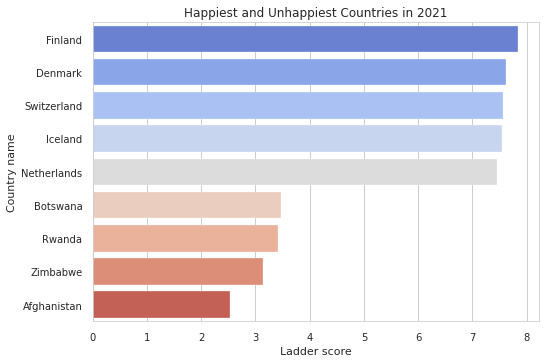

In [17]:
#Happiest an Unhappiest Countries

df2021_happiest_unhappiest = df2021[(df2021.loc[:, "Ladder score"] > 7.4) | (df2021.loc[:, "Ladder score"] < 3.5)]
sns.barplot(x = "Ladder score", y = "Country name", data=df2021_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2021")
plt.show()

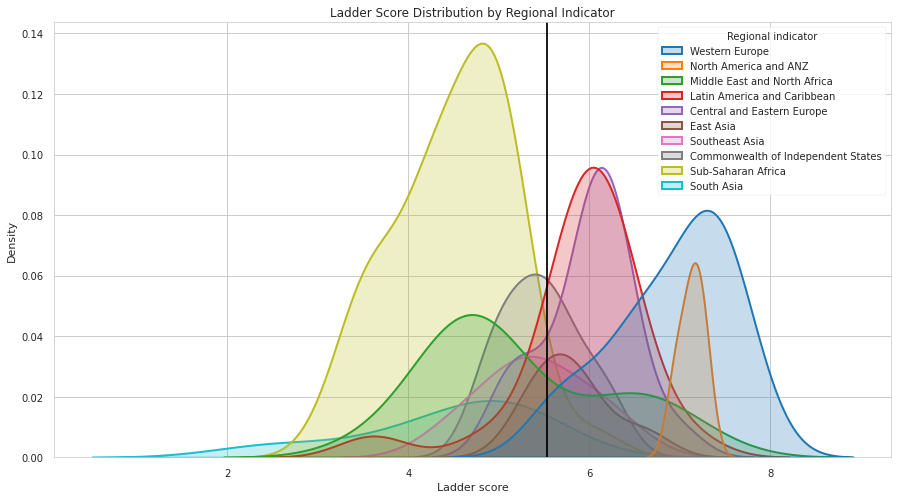

In [18]:
#Ladder Score Distribution by Regional Indicator
plt.figure(figsize = (15,8))
sns.kdeplot(df2021["Ladder score"], hue = df2021["Regional indicator"], fill = True, linewidth = 2)
plt.axvline(df2021["Ladder score"].mean(), c = "black")
plt.title("Ladder Score Distribution by Regional Indicator")
plt.show()

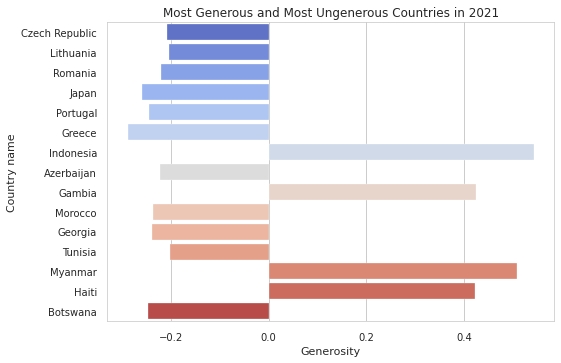

In [19]:
#Most Generous and Most Ungenerous Countries in 2021

df2021_g = df2021[(df2021.loc[:, "Generosity"] > 0.4) | (df2021.loc[:, "Generosity"] < -0.2)]
sns.barplot(x = "Generosity", y = "Country name", data = df2021_g, palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2021")
plt.show()

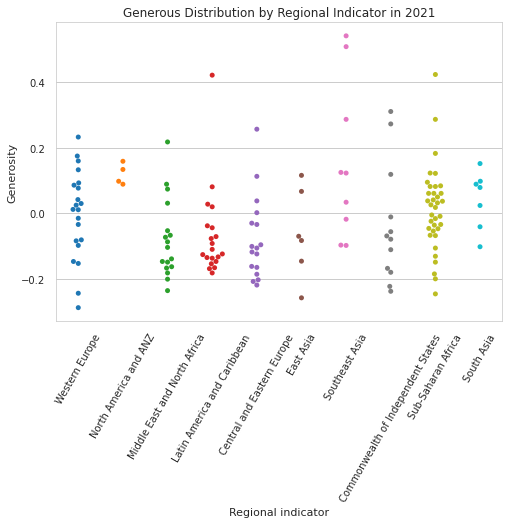

In [20]:
#Generous Distribution by Regional Indicator in 2021

sns.swarmplot(x = "Regional indicator", y = "Generosity", data = df2021)
plt.xticks(rotation = 60)
plt.title("Generous Distribution by Regional Indicator in 2021")
plt.show()

In [21]:
#Relationship Between Happiness and Income

pop = pd.read_csv("/kaggle/input/world-population-19602018/population_total_long.csv")
pop.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


In [22]:
#Find countries which has no Region
country_continent = {}
for i in range(len(df2021)):
    country_continent[df2021["Country name"][i]] = df2021["Regional indicator"][i]
all_countries = df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_2021 = df2021["Country name"].value_counts().reset_index()["index"].tolist()

for x in all_countries:
    if x not in all_countries_2021:
        print(x)

Congo (Kinshasa)
Syria
Trinidad and Tobago
Sudan
Qatar
Central African Republic
Somaliland region
Djibouti
South Sudan
Angola
Bhutan
Somalia
Belize
Suriname
Cuba
Oman
Guyana


In [23]:
# write Region for countries above
region = []
for i in range(len(df)):
    if df['Country name'][i] == 'Angola':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Belize':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Congo (Kinshasa)':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Syria':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Trinidad and Tobago':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Cuba':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Qatar':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Central African Republic':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Djibouti':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Somaliland region':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'South Sudan':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Somalia':
        region.append("Sub-Saharan Africa")
    elif df['Country name'][i] == 'Oman':
        region.append("Middle East and North Africa")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Guyana':
        region.append("Latin America and Caribbean")
    elif df['Country name'][i] == 'Bhutan':
        region.append("South Asia")
    elif df['Country name'][i] == 'Suriname':
        region.append("Latin America and Caribbean")
    else:
        region.append(country_continent[df['Country name'][i]])
        
df["region"] = region

In [24]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia


In [25]:
all_countries = df["Country name"].value_counts().reset_index()["index"].tolist()
all_countries_pop = pop["Country Name"].value_counts().reset_index()["index"].tolist()

del_cou = []
for x in all_countries:
    if x not in all_countries_pop:
        del_cou.append(x)
del_cou


['Egypt',
 'South Korea',
 'Kyrgyzstan',
 'Russia',
 'Venezuela',
 'Palestinian Territories',
 'Taiwan Province of China',
 'Iran',
 'Yemen',
 'Slovakia',
 'Hong Kong S.A.R. of China',
 'Congo (Brazzaville)',
 'Ivory Coast',
 'Laos',
 'Congo (Kinshasa)',
 'Syria',
 'North Cyprus',
 'Somaliland region',
 'Swaziland',
 'Gambia']

In [26]:
df.columns


Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'region'],
      dtype='object')

In [27]:
pop_df = df[['Log GDP per capita', 'Life Ladder', 'Country name', 'year', 'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',"region",'Perceptions of corruption']].copy()
pop_df.head()

,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption
0,7.370,3.724,Afghanistan,2008,0.451,50.80,0.718,0.168,South Asia,0.882
1,7.540,4.402,Afghanistan,2009,0.552,51.20,0.679,0.190,South Asia,0.850
2,7.647,4.758,Afghanistan,2010,0.539,51.60,0.600,0.121,South Asia,0.707
3,7.620,3.832,Afghanistan,2011,0.521,51.92,0.496,0.162,South Asia,0.731
4,7.705,3.783,Afghanistan,2012,0.521,52.24,0.531,0.236,South Asia,0.776


In [28]:
pop_df = pop_df[~pop_df["Country name"].isin(del_cou)]
pop_df = pop_df[~pop_df.year.isin([2006,2005,2007,2018,2019,2020,2021])]
pop_dict = {x:{} for x in range(2008,2018)}
for i in range(len(pop)):
    if(pop["Year"][i] in range(2008,2018)):
        pop_dict[pop["Year"][i]][pop["Country Name"][i]] = pop["Count"][i]

In [29]:
population = []
for i in pop_df.index:
    population.append(pop_dict[pop_df["year"][i]][pop_df["Country name"][i]])
pop_df["population"] = population

In [30]:
pop_df.head()


,Log GDP per capita,Life Ladder,Country name,year,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,region,Perceptions of corruption,population
0,7.370,3.724,Afghanistan,2008,0.451,50.80,0.718,0.168,South Asia,0.882,27722276
1,7.540,4.402,Afghanistan,2009,0.552,51.20,0.679,0.190,South Asia,0.850,28394813
2,7.647,4.758,Afghanistan,2010,0.539,51.60,0.600,0.121,South Asia,0.707,29185507
3,7.620,3.832,Afghanistan,2011,0.521,51.92,0.496,0.162,South Asia,0.731,30117413
4,7.705,3.783,Afghanistan,2012,0.521,52.24,0.531,0.236,South Asia,0.776,31161376


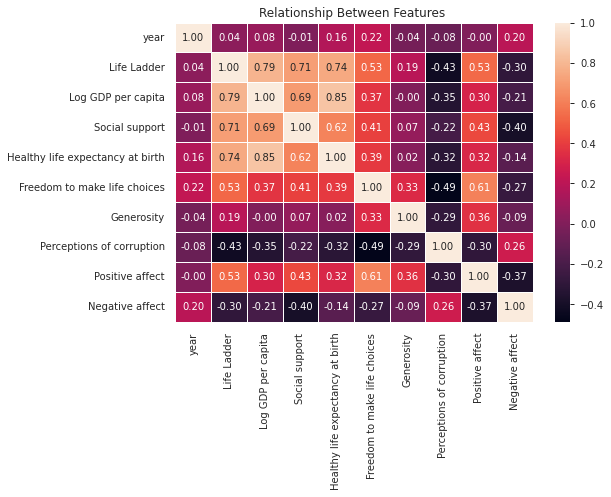

In [31]:
#Relationship between features
sns.heatmap(df.corr(), annot = True, fmt = ".2f", linewidth = .7)
plt.title("Relationship Between Features ")
plt.show()

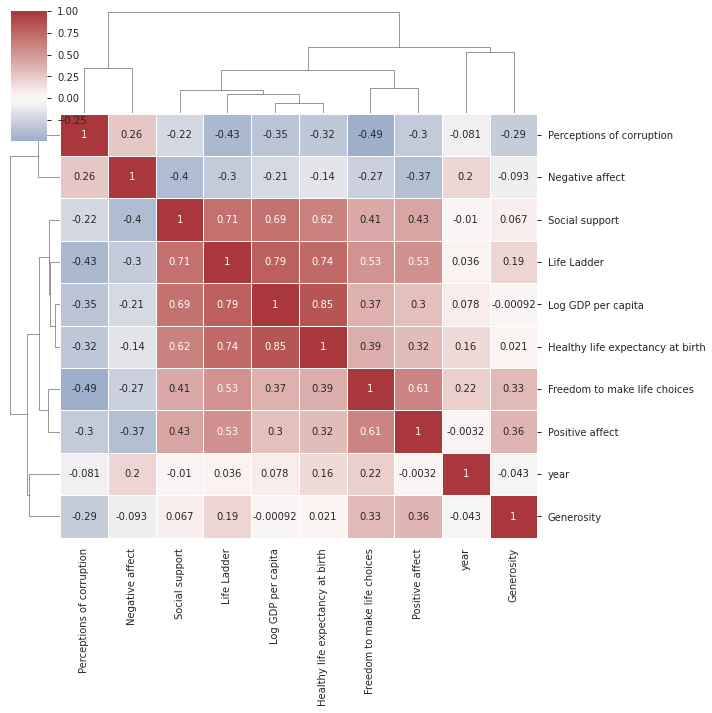

In [32]:
sns.clustermap(df.corr(), center = 0, cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .7, figsize=(10,10))
plt.show()